In [1]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import pickle
import math
import os

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import glob
import sys
import configparser


In [2]:
dirname = os.getcwd()

## Set plot parameters

In [3]:
#plt.style.use('classic')
#plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2
plt.rc('axes', unicode_minus=False)
tickfontsize = 16
axisfontsize = 18

## Test the programation of the magnetic field

Implemented in FLHET_compiled.py the magnetic field as it is in Thomas'S Charoy thesis:

$$
B(x) = a_k \exp{( -\frac{(x - x_{Bmax})^2}{2 \sigma_k^2} )} + b_k
$$
With $k = 1$ for $x \leq x_{Bmax}$ and $k = 2$ for $x > x_{Bmax}$.

In the script, the $a_k, b_k$ are calculated as function of input parameters which are:

* $B_{max}$, the maximum amplitude of the magnetic field, reached at $x = x_{Bmax}$.

* $B_{0}$, the magnetic field at $x = 0$.

* $B_{Lx}$, the magnetic field at $x = L_x$.

* The $\sigma_k$, lengthscales of B variation.

With these previous quantities:
$$ a_1 = \frac{B_{max} - B_0}{1 - \exp{(-\frac{x_{Bmax}^2}{2 \sigma_1^2})}} $$
$$ a_2 = \frac{B_{max} - B_{Lx}}{1 - \exp{(-\frac{(L_x - x_{Bmax})^2}{2 \sigma_2^2})}} $$
$$ b_1 = B_{max} - a_1 $$
$$ b_2 = B_{max} - a_2 $$


In [4]:
LX  = 0.0250
LTHR= 0.0075

In [5]:
BMAX= 10e-3 # Max Mag field
B0  = 6e-3  # Mag field at x=0
BLX = 1e-3  # Mag field at x=LX
LB1 = 0.25*LX  # Length for magnetic field
LB2 = 0.25*LX  # Length for magnetic field

In [6]:
NBPOINTS = 200
Delta_x = LX / NBPOINTS

In [7]:
x_center = np.linspace(Delta_x, LX - Delta_x, NBPOINTS)  # Mesh in the center of cell

In [8]:
a1 = (BMAX - B0)/(1 - math.exp(-LTHR**2/(2*LB1**2)))
a2 = (BMAX - BLX)/(1 - math.exp(-(LX - LTHR)**2/(2*LB2**2)))
b1 = BMAX - a1
b2 = BMAX - a2
Barr1 = a1*np.exp(-(x_center - LTHR)**2/(2*LB1**2)) + b1
Barr2 = a2*np.exp(-(x_center - LTHR)**2/(2*LB2**2)) + b2    # Magnetic field outside the thruster

Barr = np.where(x_center <= LTHR, Barr1, Barr2)

In [9]:
code_B100 = np.copy(Barr)
code_B050 = 0.5 * Barr
code_B150 = 1.5 * Barr
code_B200 = 2.0 * Barr

In [10]:
# imports Charoy's plot data
def conv(text):
    textstr = str(text)
    textstr.replace(',','.')

    try:
        f = float(textstr)
    except:
        return float('nan')
    else:
        return f

charoy_B050 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max050.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B100 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 
charoy_B150 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max150.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B200 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max200.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 


In [11]:
charoy_B100

array([[2.21978156e-02, 6.19036608e+01],
       [5.61570847e-02, 6.44214058e+01],
       [9.01158234e-02, 6.69624632e+01],
       [1.24075093e-01, 6.94802081e+01],
       [1.58034362e-01, 7.19979531e+01],
       [1.91992570e-01, 7.45623229e+01],
       [2.25951309e-01, 7.71033803e+01],
       [2.59911108e-01, 7.95978128e+01],
       [2.93873030e-01, 8.19989955e+01],
       [3.26291502e-01, 8.42789534e+01],
       [3.71069341e-01, 8.70111729e+01],
       [4.05036036e-01, 8.92025435e+01],
       [4.39009627e-01, 9.10908522e+01],
       [4.72985870e-01, 9.28625987e+01],
       [5.06965826e-01, 9.44711579e+01],
       [5.40950556e-01, 9.58699051e+01],
       [5.74938999e-01, 9.71054652e+01],
       [6.08932746e-01, 9.81079006e+01],
       [6.42930736e-01, 9.89238365e+01],
       [6.76934031e-01, 9.95066478e+01],
       [7.10945813e-01, 9.97164599e+01],
       [7.44955473e-01, 1.00019522e+02],
       [7.78978925e-01, 9.97164599e+01],
       [8.13000785e-01, 9.94833354e+01],
       [8.470321

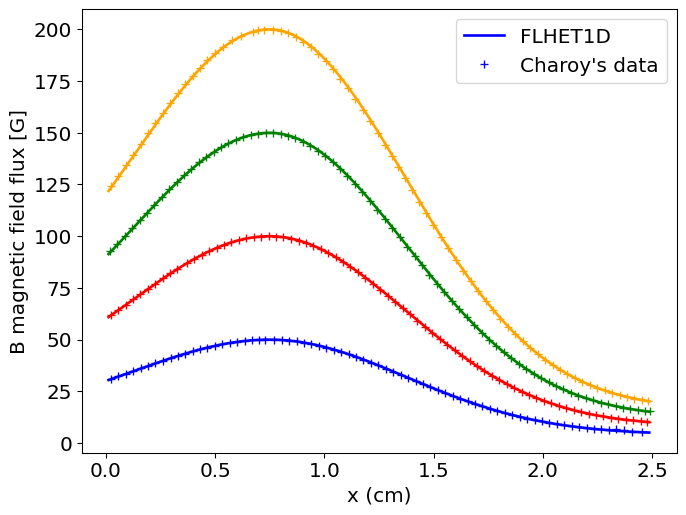

In [12]:
fig = plt.figure(figsize=(8,6), dpi=96)

plt.plot(x_center*100, code_B050*10000, 'b-', label='FLHET1D')
plt.plot(x_center*100, code_B100*10000, 'r-',)
plt.plot(x_center*100, code_B150*10000, 'g-')
plt.plot(x_center*100, code_B200*10000, '-', color='orange')

plt.plot(charoy_B050[:,0], charoy_B050[:,1], 'b+', label="Charoy's data")
plt.plot(charoy_B100[:,0], charoy_B100[:,1], 'r+')
plt.plot(charoy_B150[:,0], charoy_B150[:,1], 'g+')
plt.plot(charoy_B200[:,0], charoy_B200[:,1], '+', color= 'orange')

plt.xlabel("x (cm)")
plt.ylabel("B magnetic field flux [G]")
plt.legend()
plt.show()

## Test the ionization process

Implemented in FLHET_compiled.py the ionization profile as it is in Thomas'S Charoy thesis:

$$
S(x) = S_0 \cos{(\pi \frac{x - x_m}{x_2 - x_1})}
$$
For $x \in [x_1, x_2]$, and $S(x) = 0$ elsewhere.

With $x_m = \frac{x_1 + x_2}{2}$.


In [13]:
SIZMAX = 5.2e23
LSIZ1 = 0.0025
LSIZ2 = 0.0100

In [14]:
xm = (LSIZ1 + LSIZ2)/2
Siz_arr = SIZMAX*np.cos(math.pi*(x_center - xm)/(LSIZ2 - LSIZ1))
Siz_arr = np.where((x_center < LSIZ1)|(x_center > LSIZ2), 0., Siz_arr)

In [15]:
# imports Charoy's plot data
datacharoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/S_iz.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 

In [16]:
datacharoy

array([[ 2.41138626e-02, -7.55600570e-05],
       [ 5.62398947e-02, -1.01459823e-04],
       [ 9.20694682e-02, -7.21192669e-05],
       [ 1.15236152e-01, -7.09462702e-05],
       [ 1.60025074e-01, -6.86784767e-05],
       [ 1.84736203e-01, -6.74272803e-05],
       [ 2.31068149e-01, -4.00573586e-05],
       [ 2.47578402e-01, -1.27732659e-05],
       [ 2.55715452e-01,  1.08453362e-03],
       [ 2.63334147e-01,  2.90710974e-03],
       [ 2.72261023e-01,  5.00481130e-03],
       [ 2.78591575e-01,  6.19958099e-03],
       [ 2.89266040e-01,  8.60524071e-03],
       [ 2.99946630e-01,  1.09030890e-02],
       [ 3.06044258e-01,  1.23141258e-02],
       [ 3.14979048e-01,  1.42725572e-02],
       [ 3.22840292e-01,  1.57094401e-02],
       [ 3.28910394e-01,  1.76049402e-02],
       [ 3.35579444e-01,  2.10399609e-02],
       [ 3.38103950e-01,  1.88922649e-02],
       [ 3.56916191e-01,  2.17510476e-02],
       [ 3.60983836e-01,  2.39410770e-02],
       [ 3.68632361e-01,  2.52386459e-02],
       [ 3.

In [17]:
x_charoy = datacharoy[:, 0]
S_charoy = datacharoy[:, 1]

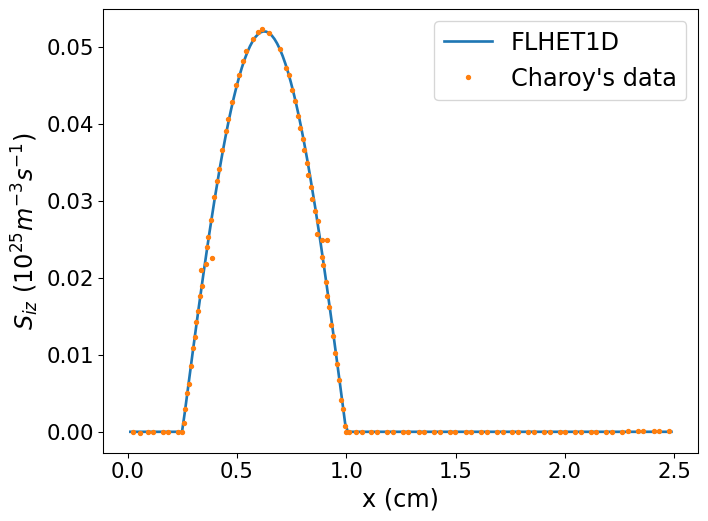

In [18]:
fig = plt.figure(figsize=(8,6), dpi=96)
plt.plot(x_center*100, Siz_arr/(1e25), label='FLHET1D')
plt.plot(x_charoy, S_charoy, marker='.', linestyle='', label="Charoy's data")
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
plt.xlabel("x (cm)", fontsize=axisfontsize)
plt.ylabel("$S_{iz}$ ($10^{25} m^{-3}s^{-1}$)", fontsize=axisfontsize)
plt.legend(fontsize=axisfontsize)

Text(0, 0.5, '$B$ field amplitude [mT]')

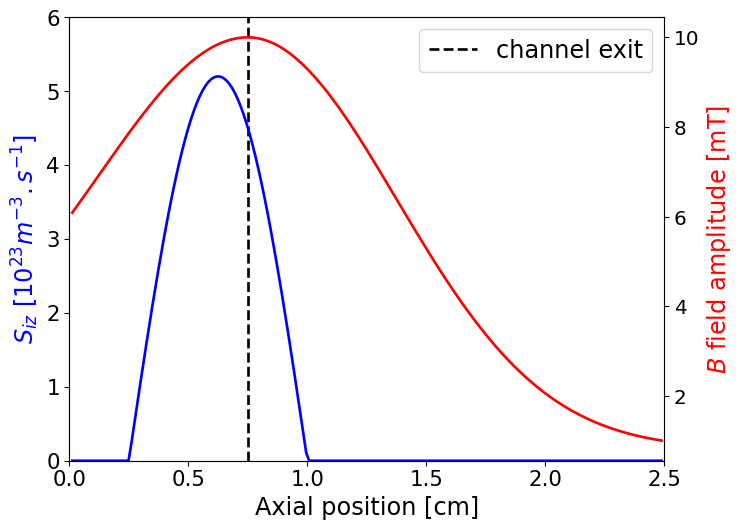

In [19]:
fig, ax = plt.subplots(figsize=(8,6), dpi=96)

ax.plot([LTHR*100, LTHR*100], [0., 10.], 'k--', label='channel exit')
ax.plot(x_center*100, Siz_arr/(1e23), 'b-')
ax.set_xlim([0., 2.5])
ax.set_ylim([0., 6.])
ax.xaxis.set_tick_params(labelsize=tickfontsize)
ax.yaxis.set_tick_params(labelsize=tickfontsize)
ax.set_xlabel("Axial position [cm]", fontsize=axisfontsize)
ax.set_ylabel("$S_{iz}$ [$10^{23} m^{-3}.s^{-1}$]", color='b', fontsize=axisfontsize)
ax.legend(fontsize=axisfontsize)

ax_b = ax.twinx()
ax_b.plot(x_center*100, code_B100*1000, 'r-')
ax_b.set_ylabel("$B$ field amplitude [mT]", color='r', fontsize=axisfontsize)

## Comparison between simulation results to Charoy's

In [20]:
RESULTSDIR = './Results/charoy_checkcase_0_N300/'
configFile = RESULTSDIR+'/Configuration.cfg'

In [21]:
config = configparser.ConfigParser()
config.read(configFile)

physicalParameters = config["Physical Parameters"]

VG = float(physicalParameters["Gas velocity"])  # Gas velocity
Mi = float(physicalParameters["Ion Mass"]) * phy_const.m_u  # Ion Mass
me = phy_const.m_e  # Electron mass
R1 = float(physicalParameters["Inner radius"])  # Inner radius of the thruster
R2 = float(physicalParameters["Outer radius"])  # Outer radius of the thruster
A0 = np.pi * (R2**2 - R1**2)  # Area of the thruster
LX = float(physicalParameters["Length of axis"])  # length of Axis of the simulation
LTHR = float(
    physicalParameters["Length of thruster"]
)  # length of thruster (position of B_max)
alpha_B1 = float(
    physicalParameters["Anomalous transport alpha_B1"]
)  # Anomalous transport
alpha_B2 = float(
    physicalParameters["Anomalous transport alpha_B2"]
)  # Anomalous transport
MDOT = float(physicalParameters["Mass flow"])  # Mass flow rate of propellant
Te_Cath = float(
    physicalParameters["e- Temperature Cathode"]
)  # Electron temperature at the cathode
TE0 = float(physicalParameters["Initial e- temperature"]) # Initial electron temperature at the cathode.
NI0 = float(physicalParameters["Initial plasma density"]) # Initial plasma density.
#NG0 = float(physicalParameters["Initial neutrals density"]) # Initial neutrals density. No need for this parameter it is processed to have be coehrent with MDOT, AO and VG.
Rext = float(physicalParameters["Ballast resistor"])  # Resistor of the ballast
V = float(physicalParameters["Voltage"])  # Potential difference
Circuit = bool(
    config.getboolean("Physical Parameters", "Circuit", fallback=False)
)  # RLC Circuit


# Magnetic field configuration
MagneticFieldConfig = config["Magnetic field configuration"]

if MagneticFieldConfig["Type"] == "Default":
    print(MagneticFieldConfig["Type"] + " Magnetic Field")

    BMAX = float(MagneticFieldConfig["Max B-field"])  # Max Mag field
    B0 = float(MagneticFieldConfig["B-field at 0"])  # Mag field at x=0
    BLX = float(MagneticFieldConfig["B-field at LX"])  # Mag field at x=LX
    LB1 = float(MagneticFieldConfig["Length B-field 1"])  # Length for magnetic field
    LB2 = float(MagneticFieldConfig["Length B-field 2"])  # Length for magnetic field
    saveBField = bool(MagneticFieldConfig["Save B-field"])


# Ionization source term configuration
IonizationConfig = config["Ionization configuration"]
if IonizationConfig["Type"] == "SourceIsImposed":
    print("The ionization source term is imposed as specified in T.Charoy's thesis, section 2.2.2.")
SIZMAX  = float(IonizationConfig["Maximum S_iz value"])  # Max Mag field
LSIZ1   = float(IonizationConfig["Position of 1st S_iz zero"])  # Mag field at x=0
LSIZ2   = float(IonizationConfig["Position of 2nd S_iz zero"])  # Mag field at x=LX
assert(LSIZ2 >= LSIZ1)

# Collisions parameters
CollisionsConfig = config["Collisions"]
KEL = float(CollisionsConfig["Elastic collisions reaction rate"])

# Wall interactions
WallInteractionConfig = config["Wall interactions"]
ESTAR = float(WallInteractionConfig["Crossover energy"])  # Crossover energy
assert((WallInteractionConfig["Type"] == "Default")|(WallInteractionConfig["Type"] == "None"))

##########################################################
#           NUMERICAL PARAMETERS
##########################################################
NumericsConfig = config["Numerical Parameteres"]

NBPOINTS = int(NumericsConfig["Number of points"])  # Number of cells
SAVERATE = int(NumericsConfig["Save rate"])  # Rate at which we store the data
CFL = float(NumericsConfig["CFL"])  # Nondimensional size of the time step
TIMEFINAL = float(NumericsConfig["Final time"])  # Last time of simulation
Results = NumericsConfig["Result dir"]  # Name of result directory
TIMESCHEME = NumericsConfig["Time integration"]  # Time integration scheme

    
Delta_x  = LX/NBPOINTS

x_center = np.linspace(0.5*Delta_x, LX - 0.5*Delta_x, NBPOINTS)  # Mesh in the center of cell
alpha_B = (np.ones(NBPOINTS) * alpha_B1)  # Anomalous transport coefficient inside the thruster
alpha_B = np.where(x_center < LTHR, alpha_B, alpha_B2)  # Anomalous transport coefficient in the plume
alpha_B_smooth = np.copy(alpha_B)

# smooth between alpha_B1 and alpha_B2
nsmooth_o2 = NBPOINTS//10
for index in range(nsmooth_o2, NBPOINTS - (nsmooth_o2-1)):
    alpha_B_smooth[index] = np.mean(alpha_B[index-nsmooth_o2:index+nsmooth_o2])
alpha_B = alpha_B_smooth


Default Magnetic Field
The ionization source term is imposed as specified in T.Charoy's thesis, section 2.2.2.


In [22]:
##########################################################
#           Make the plots
##########################################################

ResultsFigs = RESULTSDIR+"/Figs_vs_Charoy"
ResultsData = RESULTSDIR+"/Data"

if not os.path.exists(ResultsFigs):
    os.makedirs(ResultsFigs)


In [23]:
# open all the files in the directory and sort them to do the video in order
files       = glob.glob(ResultsData + "/*.pkl")
filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
files.sort(key=os.path.getmtime)


Current = np.zeros(np.shape(files)[0])
Voltage = np.zeros(np.shape(files)[0])
time    = np.zeros(np.shape(files)[0])

In [24]:
# Copies function from MakePlots_Charoy.py
def gradient(y, d):
    dp_dz = np.zeros(y.shape)
    dp_dz[1:-1] = (y[2:] - y[:-2]) / (2 * d)
    dp_dz[0] = 2 * dp_dz[1] - dp_dz[2]
    dp_dz[-1] = 2 * dp_dz[-2] - dp_dz[-3]

    return dp_dz


def compute_E(fP, fB, fESTAR, wall_inter_type:str, fR1, fR2, fM, fx_center, fLTHR, fKEL, falpha_B, fDelta_x, fJ):

    # TODO: This is already computed! Maybe move to the source
    #############################################################
    #       We give a name to the vars to make it more readable
    #############################################################
    ng = fP[0,:]
    ni = fP[1,:]
    ui = fP[2,:]
    Te = fP[3,:]
    ve = fP[4,:]
    Gamma_i = ni*ui
    me = phy_const.m_e
    wce     = phy_const.e*fB/me   # electron cyclotron frequency
    
    #############################
    #       Compute the rates   #
    #############################

    sigma = 2.0 * Te / fESTAR  # SEE yield
    sigma[sigma > 0.986] = 0.986
    if wall_inter_type == "Default":
        # nu_iw value before Martin changed the code for Charoy's test cases.    
        nu_iw = (4./3.)*(1./(fR2 - fR1))*np.sqrt(phy_const.e*Te/fM)
        # Limit the wall interactions to the inner channel
        nu_iw[fx_center > fLTHR] = 0.0
        nu_ew = nu_iw / (1.0 - sigma)  # Electron - wall collision rate        
    
    elif wall_inter_type == "None":
        nu_iw = np.zeros(Te.shape, dtype=float)     # Ion - wall collision rate
        nu_ew = np.zeros(Te.shape, dtype=float)     # Electron - wall collision rate



    # TODO: Put decreasing wall collisions (Not needed for the moment)
    #    if decreasing_nu_iw:
    #        index_L1 = np.argmax(z > L1)
    #        index_LTHR = np.argmax(z > LTHR)
    #        index_ind = index_L1 - index_LTHR + 1
    #
    #        nu_iw[index_LTHR: index_L1] = nu_iw[index_LTHR] * np.arange(index_ind, 1, -1) / index_ind
    #        nu_iw[index_L1:] = 0.0

    ##################################################
    #       Compute the electron properties          #
    ##################################################

    nu_m = (
        ng * fKEL + falpha_B * wce + nu_ew
        )  # Electron momentum - transfer collision frequency
    
    mu_eff = (phy_const.e / (me* nu_m)) * (
        1.0 / (1 + (wce / nu_m) ** 2)
        )  # Effective mobility    dp_dz  = np.gradient(ni*Te, Delta_x)

    I0 = fJ/(phy_const.e*A0)
    dp_dz  = gradient(ni*Te, fDelta_x)

    
    E = (I0 - Gamma_i) / (mu_eff * ni) - dp_dz / ni  # Discharge electric field
    return E


def cumTrapz(y, d):
    n = y.shape[0]
    cuminteg = np.zeros(y.shape, dtype=float)
    
    for i in range(1, n):
        cuminteg[i] = cuminteg[i-1] + d * (y[i] + y[i-1]) / 2.0

    return cuminteg


def compute_phi(fP, fB, fESTAR, wall_inter_type:str, fR1, fR2, fM, fx_center, fLTHR, fKEL, falpha_B, fDelta_x, fJ, fV, fRext):
    
    E   = compute_E(fP, fB, fESTAR, wall_inter_type, fR1, fR2, fM, fx_center, fLTHR, fKEL, falpha_B, fDelta_x, fJ)
    phi = fV - fJ * fRext - cumTrapz(E, Delta_x)  # Discharge electrostatic potential
    return phi


# Open single file

In [25]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

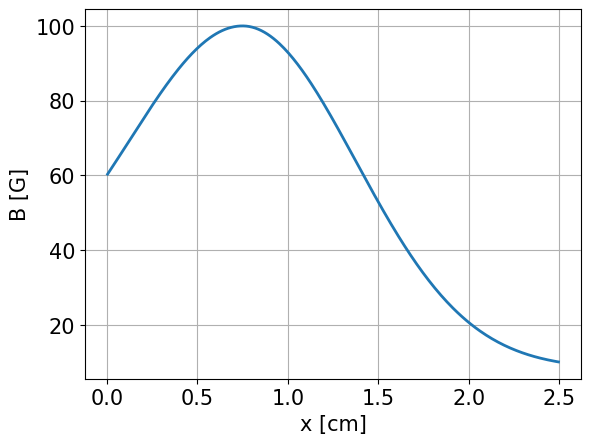

In [26]:
f, ax = plt.subplots()
ax.plot(x_center*100, B*1e4)
ax.set_ylabel('B [G]')
ax.set_xlabel('x [cm]')
ax.grid(True)

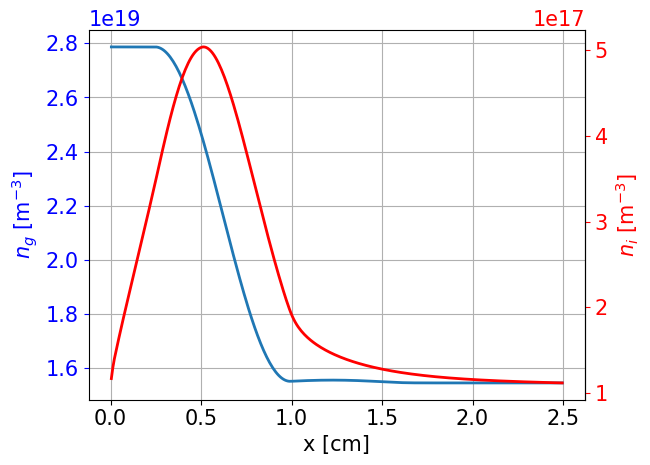

In [27]:
f, ax = plt.subplots()

ax_n_i=ax.twinx()

ax.plot(x_center*100, P[0,:])

ax_n_i.plot(x_center*100, P[1,:], 'r')

ax_n_i.set_frame_on(True)
ax_n_i.patch.set_visible(False)

plt.setp(ax_n_i.spines.values(), visible=False)
ax_n_i.spines["right"].set_visible(True)



ax.set_ylabel('$n_g$ [m$^{-3}$]')
ax_n_i.set_ylabel('$n_i$ [m$^{-3}$]')

ax.set_xlabel('x [cm]')

ax.yaxis.label.set_color('b')
ax.tick_params(axis='y', colors='b')

ax_n_i.yaxis.label.set_color('r')
ax_n_i.tick_params(axis='y', colors='r')

ax.grid(True)

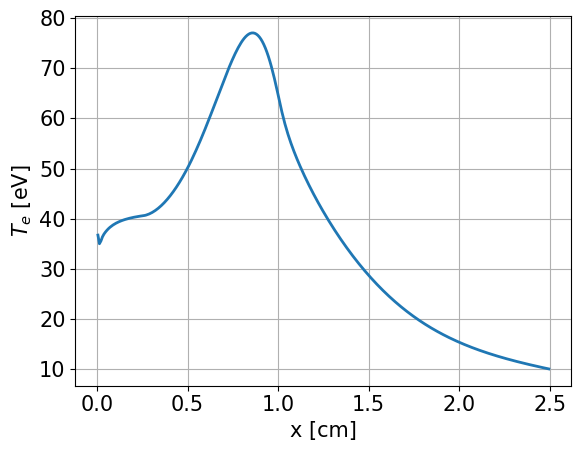

In [28]:
f, ax = plt.subplots()

ax.plot(x_center*100, P[3,:])

ax.set_ylabel('$T_e$ [eV]')
ax.set_xlabel('x [cm]')

ax.grid(True)

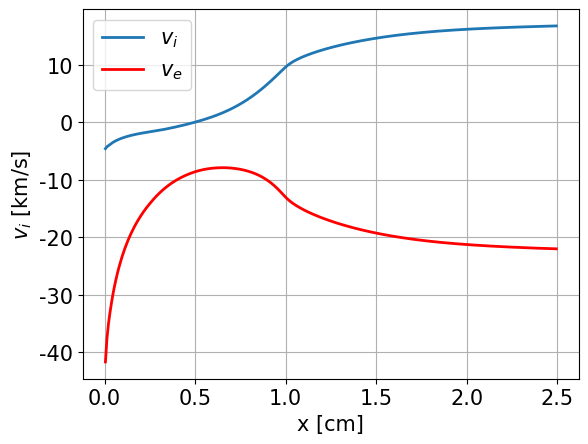

In [29]:
f, ax = plt.subplots()

ax.plot(x_center*100, P[2,:]/1000, label="$v_i$")

ax.plot(x_center*100, P[4,:]/1000, 'r', label="$v_e$")

ax.set_ylabel('$v_i$ [km/s]')
ax.set_xlabel('x [cm]')

ax.legend()
ax.grid(True)

# Open single file and Comparison with Charoy digitized plots.

In [30]:
# Collecting data from Charoy's thesis. These are digitized data from screen of figures. Made with WebPlotDigitizer.
Ex_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Ex_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
ni_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/ni_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

In [31]:
Ex_charoy

array([[ 0.10857, -0.00804],
       [ 0.14933,  0.01345],
       [ 0.19009,  0.03241],
       [ 0.22666,  0.0619 ],
       [ 0.27181, -0.02359],
       [ 0.31283, -0.13043],
       [ 0.35169, -0.08901],
       [ 0.3979 , -0.01201],
       [ 0.43845,  0.11935],
       [ 0.47706,  0.28594],
       [ 0.50821,  0.47943],
       [ 0.53192,  0.67914],
       [ 0.55189,  0.89793],
       [ 0.56815,  1.11323],
       [ 0.58255,  1.33222],
       [ 0.59803,  1.5692 ],
       [ 0.61239,  1.80895],
       [ 0.62748,  2.05608],
       [ 0.64   ,  2.28662],
       [ 0.65438,  2.51715],
       [ 0.66876,  2.74768],
       [ 0.68557,  2.99664],
       [ 0.69859,  3.22902],
       [ 0.71184,  3.46694],
       [ 0.72622,  3.69747],
       [ 0.74069,  3.88417],
       [ 0.75877,  4.1139 ],
       [ 0.78394,  4.5181 ],
       [ 0.80209,  4.7163 ],
       [ 0.82759,  4.9502 ],
       [ 0.86258,  5.07185],
       [ 0.90356,  4.98766],
       [ 0.93547,  4.7952 ],
       [ 0.95443,  4.58594],
       [ 0.967

In [32]:
def cumTrapz_from_custom_x(y, x):
    assert(x.shape == y.shape)
    cuminteg = np.zeros(y.shape, dtype=float)
    n = y.shape[0]
    for i in range(1, n):
        d = x[i] - x[i-1]
        cuminteg[i] = cuminteg[i-1] + d * (y[i] + y[i-1]) / 2

    return cuminteg

In [33]:
phi_charoy = V - cumTrapz_from_custom_x(Ex_charoy[:, 1]*10000, Ex_charoy[:, 0]/100)

In [34]:
phi_charoy

array([ 2.00000000e+02,  1.99988974e+02,  1.99895512e+02,  1.99723066e+02,
        1.99636581e+02,  1.99952476e+02,  2.00378848e+02,  2.00612255e+02,
        2.00394623e+02,  1.99612211e+02,  1.98420147e+02,  1.97046662e+02,
        1.95471958e+02,  1.93836885e+02,  1.92076161e+02,  1.89830461e+02,
        1.87404950e+02,  1.84488785e+02,  1.81770254e+02,  1.78316344e+02,
        1.74530931e+02,  1.69702830e+02,  1.65649925e+02,  1.61213852e+02,
        1.56062641e+02,  1.50577325e+02,  1.43347069e+02,  1.32483697e+02,
        1.24103479e+02,  1.11778692e+02,  9.42451153e+01,  7.36331793e+01,
        5.80246262e+01,  4.91313055e+01,  4.31245873e+01,  3.72659348e+01,
        3.01451282e+01,  2.47272176e+01,  2.22262939e+01,  2.06246483e+01,
        1.89919940e+01,  1.74286602e+01,  1.56474251e+01,  1.33269682e+01,
        1.09778937e+01,  8.18431595e+00,  6.41008685e+00,  4.98672685e+00,
        3.80717302e+00,  2.75540008e+00,  1.78373480e+00,  9.03732980e-01,
        1.36423040e-01, -

In [35]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

In [36]:
Ex_fluid = compute_E(P, B, ESTAR, WallInteractionConfig['Type'], R1, R2, Mi, x_center, LTHR, KEL, alpha_B, Delta_x, J)
phi_fluid = compute_phi(P, B, ESTAR, WallInteractionConfig['Type'], R1, R2, Mi, x_center, LTHR, KEL, alpha_B, Delta_x, J, V, Rext)

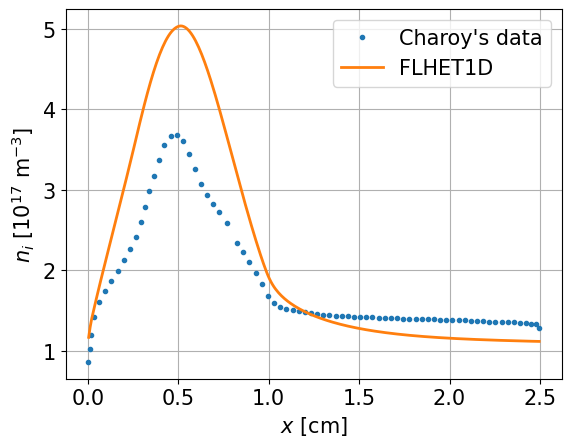

In [37]:
f, ax = plt.subplots()

ax.plot(ni_charoy[:,0], ni_charoy[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, P[1,:]/1e17, '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$n_i$ [$10^{17}$ m$^{-3}$]")

ax.grid(True)
ax.legend()

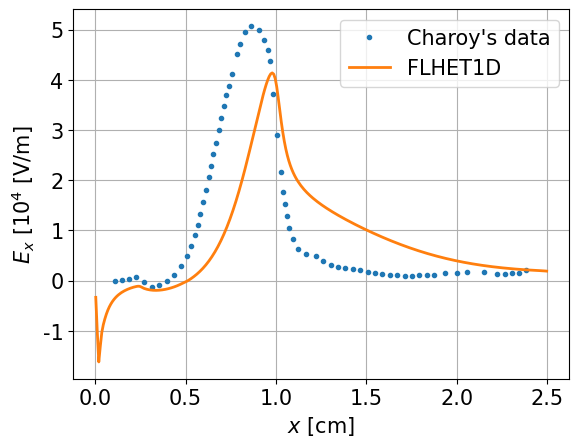

In [38]:
f, ax = plt.subplots()

ax.plot(Ex_charoy[:,0], Ex_charoy[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, Ex_fluid/10000, '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$E_x$ [$10^{4}$ [V/m]")

ax.grid()
ax.legend()

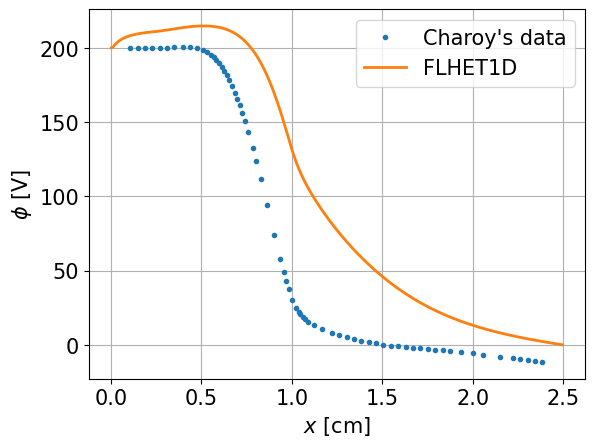

In [39]:
f, ax = plt.subplots()

ax.plot(Ex_charoy[:,0], phi_charoy, '.', label="Charoy's data")
ax.plot(x_center*100, phi_fluid, '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$\\phi$ [V]")

ax.grid()
ax.legend()

Comparison of electronic temperature. Warning: the data from Charoy's thesis with regard to $T_e$ is not from the 4th Chapter, because he does not display this curve. But since B=100 G and J = 400 A $m^{-2}$ is the nominal case of 3rd Chapter benchmark, I took $T_e$ from Figure 3.7 (LPP's curve).

In [40]:
Te_benchmark = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Te_from_benchmark.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

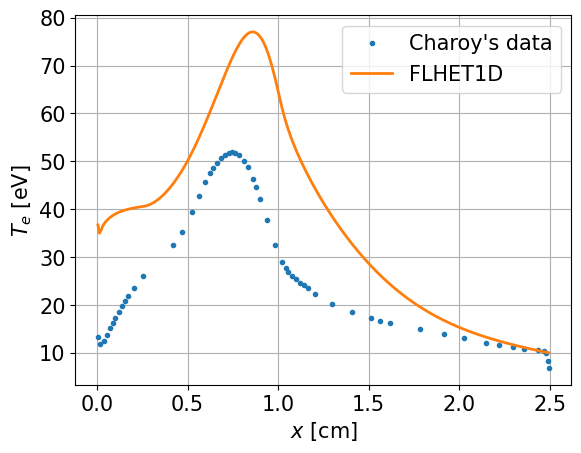

In [41]:
f, ax = plt.subplots()

ax.plot(Te_benchmark[:,0], Te_benchmark[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, P[3,:], '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$T_e$ [eV]")

ax.grid()
ax.legend()

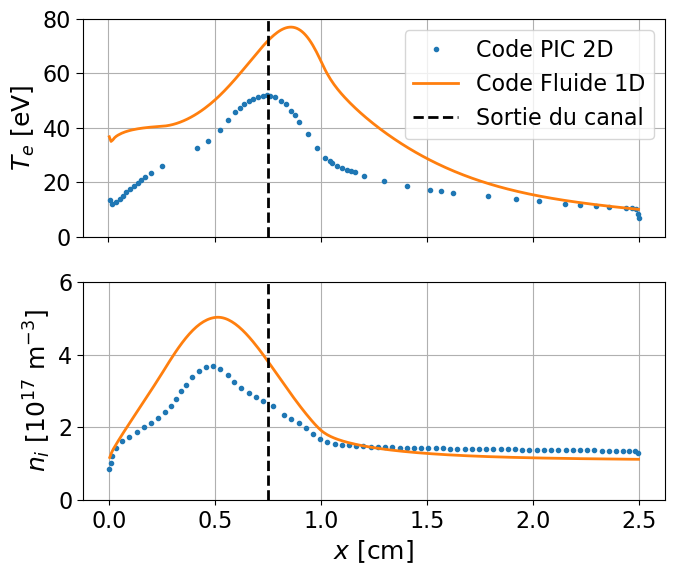

In [42]:
#same plots but with better font size etc for presentation.

f, ax = plt.subplots(2,1, figsize=(7,6))

ax[0].plot(Te_benchmark[:,0], Te_benchmark[:,1], '.', label="Code PIC 2D")
ax[0].plot(x_center*100, P[3,:], '-', label="Code Fluide 1D")
ax[0].plot([LTHR*100, LTHR*100], [0., 100.], 'k--', label="Sortie du canal")
ax[0].set_ylim([0.,80.])
ax[0].set_xticklabels([])
ax[0].yaxis.set_tick_params(labelsize=tickfontsize, size=5)
ax[0].set_ylabel("$T_e$ [eV]",fontsize=axisfontsize)
ax[0].grid()
ax[0].legend(fontsize=tickfontsize)

ax[1].plot(ni_charoy[:,0],ni_charoy[:,1], '.')
ax[1].plot(x_center*100, P[1,:]/1e17, '-')
ax[1].plot([LTHR*100, LTHR*100], [0., 100.], 'k--', label="Sortie du canal")
ax[1].set_ylim([0., 6.])
ax[1].xaxis.set_tick_params(labelsize=tickfontsize)
ax[1].yaxis.set_tick_params(labelsize=tickfontsize, size=4)
ax[1].set_xlabel("$x$ [cm]", fontsize=axisfontsize)
ax[1].set_ylabel("$n_i$ [$10^{17}$ m$^{-3}$]", fontsize=axisfontsize)
ax[1].grid()

plt.tight_layout()



# Parametric study of $\vec{B}$ amplitude and ionization current density, comparison with Charoy results.